## Language as data A1 
by Elmas Kat 2828399

In [64]:
import nltk
from nltk.tokenize import word_tokenize

In [65]:
path = r"C:\Users\KatElmas\OneDrive - van der Meij college\bureaublad\SelGulMemoryConvo_Elmas.txt"

with open(path, "r", encoding="utf-8") as f:
    text = f.read()

In [66]:
lines = text.split("\n")

selinay_lines = []
gultanem_lines = []

for line in lines:
    lower = line.lower()
    if lower.startswith("selinay"):
        selinay_lines.append(line)
    elif lower.startswith("gultanem"):
        gultanem_lines.append(line)

selinay_text = " ".join(selinay_lines)
gultanem_text = " ".join(gultanem_lines)

selinay_tokens = word_tokenize(selinay_text.lower())
gultanem_tokens = word_tokenize(gultanem_text.lower())

len(selinay_tokens), len(gultanem_tokens)

(560, 493)

## Quantitative Analysis

Frequency distribution

In [67]:
from nltk.probability import FreqDist

fdist = FreqDist(tokens)
fdist.most_common(20)

[('gultanem', 106),
 ('selinay', 98),
 ('(', 60),
 (')', 60),
 ('we', 29),
 ('toen', 25),
 ('laughs', 25),
 ('maar', 22),
 ('ja', 21),
 ('[', 20),
 (']', 20),
 ('en', 18),
 ('die', 16),
 ('dat', 14),
 ('van', 13),
 ('nee', 11),
 ('was', 11),
 ('niet', 10),
 (':', 10),
 ('toch', 10)]

<Axes: xlabel='Samples', ylabel='Counts'>

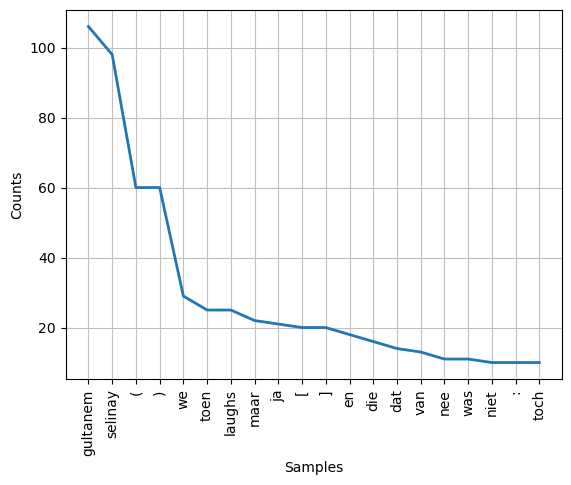

In [68]:
import matplotlib.pyplot as plt
fdist.plot(20)

Explanation frequency distribution

It is noticeable that 'ja' and 'ohja' occur frequently. This is typical of natural, spontaneous conversations in which speakers often use markers to show turn-taking and engagement.

Type-token ratio

In [69]:
ttr = len(set(tokens)) / len(tokens)
ttr

0.21367521367521367

In [70]:
ttr_selinay = len(set(selinay_tokens)) / len(selinay_tokens)
ttr_gultanem = len(set(gultanem_tokens)) / len(gultanem_tokens)

ttr_selinay, ttr_gultanem

(0.29285714285714287, 0.27586206896551724)

Explanation TTR

The TTR is low (0.21), which makes sense in this conversation. Speakers repeat many words ('ja', 'uhm'), which makes the vocabulary less varied.

Sentence length


In [71]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
avg_len = sum(len(word_tokenize(s)) for s in sentences) / len(sentences)
avg_len

210.6

Explanation sentence length

The calculated average sentence length is 210.6 words. This is not a realisti representation of spoken language but a result of how NLTK detects sentences. Because my transcript consists of continuous speech with annotations or overlapping speakersm NLTK may see these large chunks of text as one sentence. Therefore, this measurement is not useful as a true sentence length.

Function vs. content words


In [72]:
function_words = set(["en", "maar", "of", "want", "dus", "ja", "uhm", "ik", "je"])
function_count = sum(1 for w in tokens if w in function_words)
content_count = len(tokens) - function_count

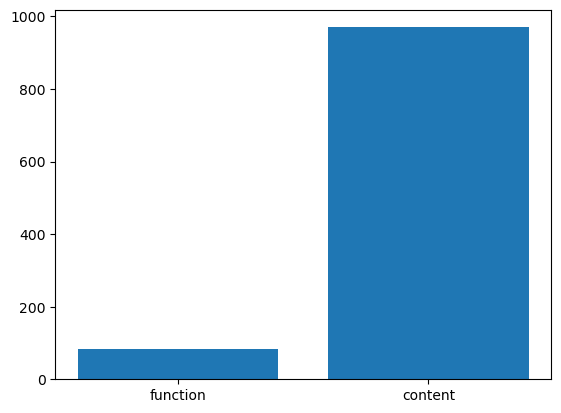

In [73]:
plt.bar(["function", "content"], [function_count, content_count])
plt.show()

Explanation function words vs. content words

In my dataset, I see that content words occur much often than function words. The high frequency of content words is because the speakers are mainly telling a story. They describe events, locations, actions and emotions. In these type of conversations, content words like nouns and verbs are much more numerous than linking words.

Discourse markers

In [74]:
dm = ["ja", "ohja", "enzo"]
{m: tokens.count(m) for m in dm}

{'ja': 21, 'ohja': 8, 'enzo': 5}

In [75]:
selinay_ja   = selinay_tokens.count("ja")
gultanem_ja  = gultanem_tokens.count("ja")

selinay_ohja  = selinay_tokens.count("ohja")
gultanem_ohja = gultanem_tokens.count("ohja")

selinay_enzo  = selinay_tokens.count("enzo")
gultanem_enzo = gultanem_tokens.count("enzo")

selinay_ja, gultanem_ja, selinay_ohja, gultanem_ohja, selinay_enzo, gultanem_enzo

(11, 10, 4, 4, 3, 2)

Explanation discourse markers

These markers are used to attract attention, continue the story and make turn-taking smoother.

## Qualitative exploration

In [76]:
from nltk.text import Text
t = Text(tokens)

In [77]:
t.concordance("ja")

Displaying 21 of 21 matches:
ngen selinay selinay ohja tweede keer ja selinay selinay maar toen uhm ( 1.0 )
 selinay dus toen zeiden ze tegen ons ja jullie mogen alleen buiten want binne
vonden ( ( laughs ) ) selinay selinay ja ( ( laughs ) ) selinay selinay en toe
ht lang erover gedaan selinay selinay ja ik heb tape in mijn achterbak en dan 
t selinay selinay iemand vroeg zo van ja waarom hoeft zij geen bandje waarom h
t zij geen bandje selinay selinay zei ja toen zei van elmas van ja dit is een 
selinay zei ja toen zei van elmas van ja dit is een kind die hoeft nog geen ba
y selinay [ ] oh maar selinay selinay ja : selinay selinay [ ] ( ( laughs ) ) 
ay [ ] ( ( laughs ) ) selinay selinay ja : selinay selinay ja maar we zaten to
 selinay selinay ja : selinay selinay ja maar we zaten toen beneden in het don
iet aan konden he [ ] selinay selinay ja : : selinay selinay en toen moesten w
 ) ) gultanem gultanem ( ( laughs ) ) ja we dachten wat er gebeurt er allemaal
n gultanem gultanem het

Explanation concordance

When looking at the concordance of 'ja', it appears that it is often used as agreement ('ja maar'), as a signal of transition ('ja toen') and sometimes as a thinking marker. This shows that 'ja' has multiple discourse functions.

## Export formats

In [78]:
import json
import csv

# TXT
with open("corpus_export.txt", "w") as f:
    f.write(text)

# JSON
with open("corpus_export.json", "w") as f:
    json.dump(tokens, f)

# CSV
with open("corpus_export.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["token"])
    for token in tokens:
        writer.writerow([token])

## Reflection

In the beginning I struggled with selecting the correct Python codes for my analyses. At first, I used examples I found online, but later I realized that there were already provided clear and much simpler code that was more appropriate for this assignment. Once I switched to the recommended codes, the process became more structured. Splitting the transcript into two speakers was still challenging, especially because the conversation was spontaneous and not neatly divided into full sentences. This also affected some measurements, such as sentence length, which NLTK did not detect accurately or my txt file is not clearly enough.

Despite these difficulties, I found it interesting to observe which words appeared most frequently in the conversation. The frequency distribution showed that certain words such as “ja” and “toen" dominated the transcript. This is typical for spontaneous speech and shows how speakers manage turn-taking, agreement and engagement.

When comparing the two speakers, I noticed that Selinay uses more discourse markers, especially “ja” and “ohja”. This suggests that she often confirms, agrees, and aligns with what Gultanem is saying. She takes on a supportive interactional role. Gultanem, on the other hand, has a higher type–token ratio, which indicates that she uses a wider range of vocabulary. This makes sense because she delivers most of the narrative content in the conversation. Overall, Selinay contributes shorter but frequent responses, while Gultanem produces longer stretches of speech.

## Observations

TXT preserves only the raw text but loses all structure.
JSON preserves structural information (tokens) but not the original layout of the transcript.
CSV makes the corpus easy to analyze in tables, but it loses context and sentence structure.

## Potential research questions

1. Interactional roles:
How do Selinay and Gultanem differ in their use of discourse markers, and what does this reveal about their interactional roles in the conversation?

2. Lexical diversity:
To what extent does the type–token ratio differ between the two speakers, and how does this relate to their roles as storyteller and supporter?

3. Engagement strategies:
How do the two speakers use engagement markers (e.g., “ja”, “ohja”) to manage turn-taking and display involvement in the conversation?